In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.gridspec as grid_spec
from matplotlib.ticker import FuncFormatter

import seaborn as sns

import numpy as np 
import pandas as pd


In [3]:
data = pd.read_csv('train.csv')
data.shape

(891, 12)

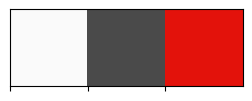

In [4]:
sns.palplot(['#fafafa', '#4a4a4a', '#e3120b'])

C:\Users\Viraj\AppData\Local\Temp\ipykernel_8492\3629566532.py:45: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemline, baseline = ax.stem(timeline_sub_x, levels, use_line_collection=True)


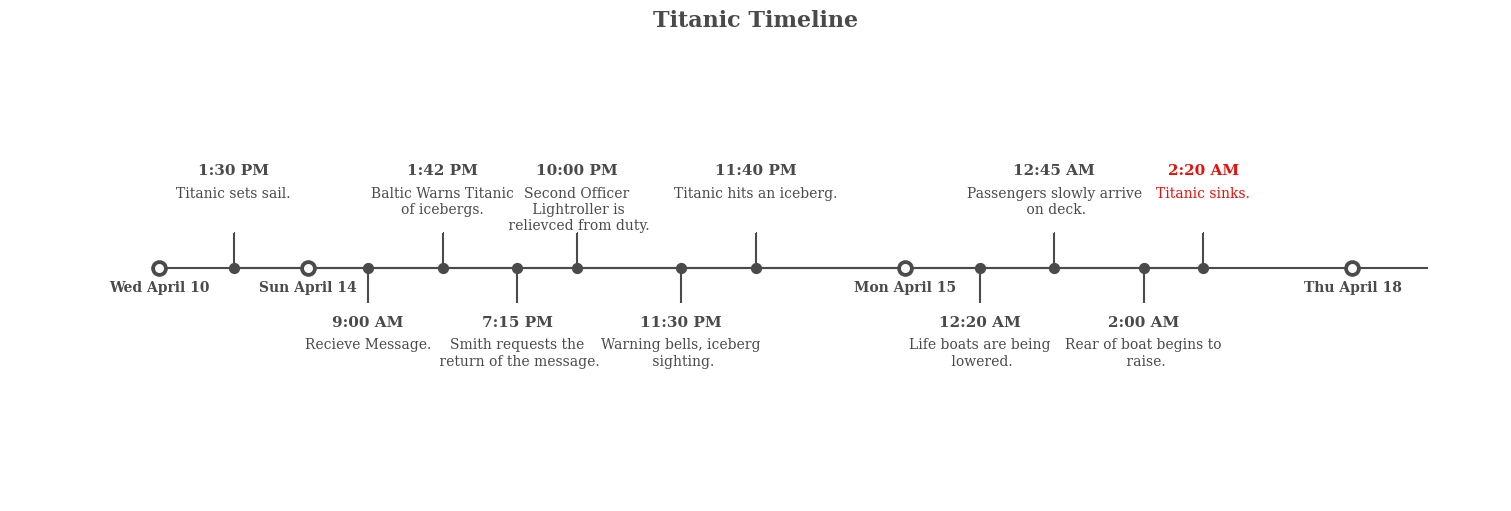

In [12]:
from datetime import datetime

timeline_dates = ["Wed April 10", "Sun April 14", "Mon April 15", "Thu April 18"]

timeline_x = [1, 2, 6, 9]

timeline_sub_x = [1.5, 2.4, 2.9, 3.4, 3.8, 4.5, 5.0, 6.5, 7, 7.6, 8]

timeline_sub_times = ["1:30 PM", "9:00 AM", "1:42 PM", "7:15 PM", "10:00 PM", "11:30 PM", "11:40 PM", "12:20 AM", "12:45 AM", "2:00 AM", "2:20 AM"]

timeline_text = ["Titanic sets sail.",
    "Recieve Message.",
    "Baltic Warns Titanic\nof icebergs.", 
    "Smith requests the\n return of the message.",
    "Second Officer\n Lightroller is\n relievced from duty.",
    "Warning bells, iceberg\n sighting.",
    "Titanic hits an iceberg.",
    "Life boats are being\n lowered.",
    "Passengers slowly arrive\n on deck.",
    "Rear of boat begins to\n raise.",
    "Titanic sinks."]

fig,ax = plt.subplots(figsize=(15,5), constrained_layout = True)
ax.set_ylim(-2,2)
ax.set_xlim(0,10)

#Timeline: Line
ax.axhline(0, xmin=0.1, xmax=0.95, c='#4a4a4a', zorder=1)

#Timeline: Date Points
ax.scatter(timeline_x, np.zeros(len(timeline_x)), s =120, c='#4a4a4a', zorder=2)
ax.scatter(timeline_x, np.zeros(len(timeline_x)), s =30, c='#fafafa', zorder=3)

# Timeline : Time Points
ax.scatter(timeline_sub_x, np.zeros(len(timeline_sub_x)), s=50, c='#4a4a4a',zorder=4)

# Date Text
for x,date in zip(timeline_x,timeline_dates):
    ax.text(x, -0.2, date, ha='center', fontfamily='serif', fontweight='bold', color='#4a4a4a')
    
# Stemplot : vertical line
levels = np.zeros(len(timeline_sub_x))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(timeline_sub_x, levels, use_line_collection=True)    
plt.setp(baseline, zorder   =0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a') 

# Text
for idx,x,time,txt in zip(range(1, len(timeline_sub_x)+1), timeline_sub_x, timeline_sub_times, timeline_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', fontfamily='serif', fontweight='bold', color='#4a4a4a' if idx!=len(timeline_sub_x) else '#e3120b', fontsize=11)
    
    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', fontfamily='serif',color='#4a4a4a' if idx!=len(timeline_sub_x) else '#e3120b')
    
# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([])

# Title
ax.set_title("Titanic Timeline", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')

plt.show()